# Machine Learning - Decision Trees

> Heuristics for learning decision trees and their theoretical properties. 

- hide: false
- toc: true
- badges: true
- comments: false
- categories: ['Machine Learning','Decision Trees','Random Forests']

# Introduction

## Classification vs. Regression

We start our discussion of decision trees with a definition of *classification* and *classifier*.

> Definition: &nbsp; **Classification** is the process of grouping data into discrete categories (i.e. **class labels**).
<br>

We may contrast this definition with *regression* which is the process of predicting a *continous* (i.e. real or complex-valued) output. 

A common example of a classification problem is the sorting of emails into the binary categories of *'spam'* and *'not spam'*. However, the labels in a classification problem need not be binary — they may be any discrete set. Whereas a common example of regression is learning a linear (or a non-linear) function that best fits a given dataset. 

> Note: The line between classification and regression is sometimes blurred. For instance, *logistic regression* is a regression algorithm which outputs a prediction in the continous probability range $[0,1]$. It's commonly used with a *decision rule* which casts its output into discrete classes. Thus, even though it's a regression algorithm, it can easily be converted into a classification algorithm and is often used for classification problems in practice.
<br>

This leads us to the expected definition of a classifier, which is:

> Definition: &nbsp; A **classifier** is any algorithm that performs classification.
<br>

## Decision Trees

*Decision trees* are one type of powerful classifier among many. 

The nodes of a decision tree correspond to the *features* of the dataset and its leaves correspond to the class labels. The paths in a decision tree correspond to the *conjunction of features* that lead to the class labels at its leaves.

To understand this, let's look at an example of a decision tree that's very easy to understand because of the historical context of the data it's attempting to learn. 

**Example:**

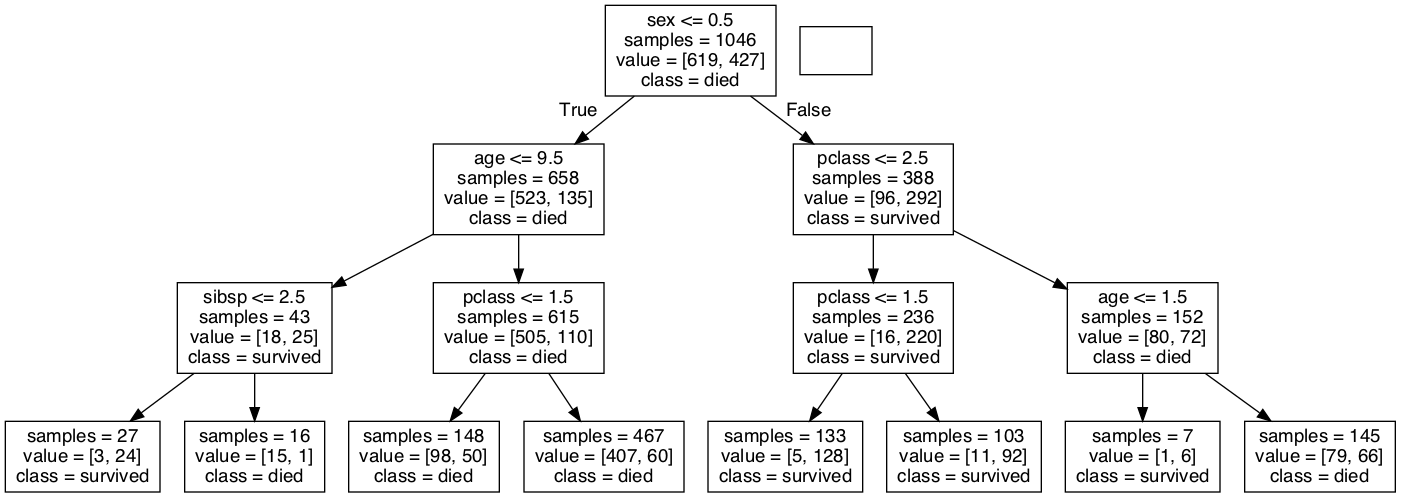

In [41]:
#collapse-hide

# Imports
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image

# Setting random state for replicability of results
RS = 2022

# Fetching data as features and labels from OpenML as a Pandas dataframe
X, y = fetch_openml("titanic", version = 1, as_frame = True, return_X_y = True)

# Cleaning and engineering data:
# Dropping unneeded columns and those with too many missing values...
X.drop(
    columns = [
        'boat', 
        'body', 
        'home.dest', 
        'cabin', 
        'ticket', 
        'name', 
        'embarked', 
        'fare'
    ], 
    inplace = True
)
# Dropping data points with any missing values and subseting labels accordingly
X['labels'] = y # Temporarily adding labels to data as a column
X.dropna(inplace = True) # Dropping the rows with any null values
y = X['labels'] # Subsetting the labels
X.drop(columns = 'labels', inplace = True) # Dropping the column of labels
# Converting 'male' and 'female' feature values into the Boolean values 0 and 1 respectively
X['sex'] = X['sex'].apply(lambda x: 0 if x == 'male' else 1)

# Defining a decision tree classifier
clf = DecisionTreeClassifier(
    random_state = RS,
    max_depth = 3
)
# Training the decision tree classifier
clf = clf.fit(X, y)

# Visualizing the decision tree
png = export_graphviz(
    clf,
    feature_names = X.columns,
    class_names = ['died','survived'],
    impurity = False,
)
graph = pydotplus.graph_from_dot_data(png)
Image(graph.create_png())


The above decision tree has identified the isolated features, as well as the conjunction of features, that best predict the chances of a given passanger of the Titanic to survive. These features, ordered loosely in terms of importance, are *sex*, *age*, *sibsp* (number of siblings or spouses), and *pclass* (passanger class).

As we can infer from the tree, were you a male passanger (`sex <= 0.5`)  on the Titanic over the age of `9.5` you probably did not survive the crash. If, however, you were either a female passanger or a male child below the age of `9.5` with fewer than `2.5` siblings (a conjunction of features), it's likely that you survived.

# Setup

## Simplifying Assumptions

In the rest of this article, for simplicity, we will assume binary input and binary output for decision trees. That is, the training set is  ${S = \{(x^1,y^1), ... ,(x^k, y^k)\}}$ with ${x^i \in \{0,1\}^n}$ and ${y^i \in \{0,1\} \ \ \forall i}$. This means that the decision tree itself is simply a binary function which also receives binary input. 

The task is to learn this function.

## Potential Function